<a href="https://colab.research.google.com/github/HimajaAmbati/skincancerwebsite/blob/main/skincancerwebipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
test_dir=pathlib.Path("/content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
train_dir=pathlib.Path("/content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [ ]:
imtrain=len(list(train_dir.glob('*/*.jpg')))
print(imtrain)
imtest=len(list(test_dir.glob('*/*.jpg')))
print(imtest)

2239
118


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from PIL import Image
import os
import json
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
batch_size=32
img_height=180
img_width=180
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
)

Found 17671 files belonging to 9 classes.
Using 14137 files for training.


In [ ]:
valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
)

Found 17671 files belonging to 9 classes.
Using 3534 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [ ]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds=valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num=9
model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(128,activation='relu'),
  layers.Dense(num)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/10
442/442 [==============================] - 1061s 2s/step - loss: 1.6547 - accuracy: 0.3627 - val_loss: 1.3317 - val_accuracy: 0.5023
Epoch 2/10
442/442 [==============================] - 690s 2s/step - loss: 1.1475 - accuracy: 0.5756 - val_loss: 0.8999 - val_accuracy: 0.6766
Epoch 3/10
442/442 [==============================] - 659s 1s/step - loss: 0.8569 - accuracy: 0.6890 - val_loss: 0.6867 - val_accuracy: 0.7600
Epoch 4/10
442/442 [==============================] - 658s 1s/step - loss: 0.6412 - accuracy: 0.7604 - val_loss: 0.4967 - val_accuracy: 0.8237
Epoch 5/10
442/442 [==============================] - 660s 1s/step - loss: 0.4622 - accuracy: 0.8278 - val_loss: 0.3194 - val_accuracy: 0.8854
Epoch 6/10
442/442 [==============================] - 645s 1s/step - loss: 0.3958 - accuracy: 0.8532 - val_loss: 0.2872 - val_accuracy: 0.8978
Epoch 7/10
442/442 [==============================] - 651s 1s/step - loss: 0.3199 - accuracy: 0.8820 - val_loss: 0.3049 - val_accuracy: 0.895

Accuracy is 90% and validation accuracy is 91%

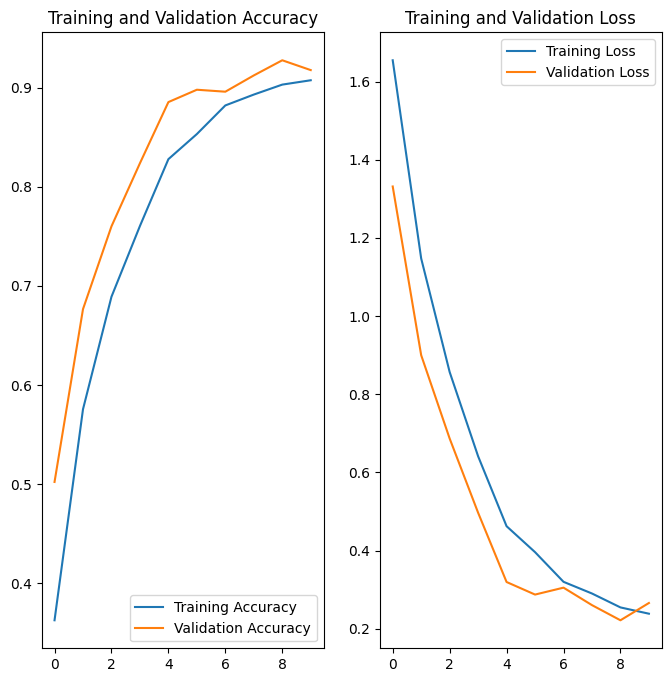

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy}')

4/4 [==============================] - 7s 241ms/step - loss: 44.1383 - accuracy: 0.1132
Test accuracy: 0.11320754885673523


1/1 [==============================] - 0s 115ms/step


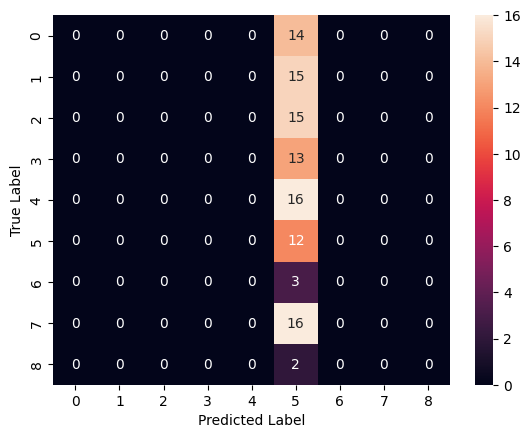

In [ ]:
# prompt: Print confusion matrix for this model using seaborn

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y_true = []
y_pred = []

for images, labels in test_ds:
  y_true.extend(labels.numpy())
  predictions = model.predict(images)
  y_pred.extend(np.argmax(predictions, axis=1))

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


1/1 [==============================] - 0s 130ms/step


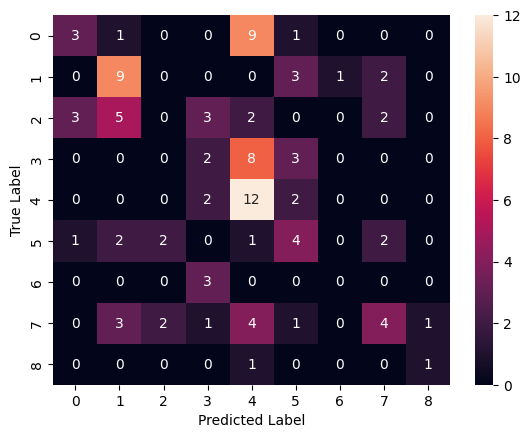

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y_true = []
y_pred = []

for images, labels in test_ds:
  y_true.extend(labels.numpy())
  predictions = model.predict(images)
  y_pred.extend(np.argmax(predictions, axis=1))

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix, precision, recall, and F1 score
conf_matrix = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

4/4 [==============================] - 5s 241ms/step
Confusion Matrix:
[[ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  2  0  0  0]]
Precision: 0.012815948736205056
Recall: 0.11320754716981132
F1 Score: 0.023025263831148068


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get class names
class_names = test_ds.class_names

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

4/4 [==============================] - 6s 431ms/step
                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        14
      basal cell carcinoma       0.00      0.00      0.00        15
            dermatofibroma       0.29      0.13      0.18        15
                  melanoma       0.23      0.23      0.23        13
                     nevus       0.18      0.38      0.24        16
pigmented benign keratosis       0.19      0.42      0.26        12
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.00      0.00      0.00        16
           vascular lesion       0.33      0.50      0.40         2

                  accuracy                           0.16       106
                 macro avg       0.14      0.18      0.15       106
              weighted avg       0.12      0.16      0.13       106



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(input_shape=(img_height, img_width, 3),
                                                  include_top=False,
                                                  weights='imagenet')

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
num=9
model2= tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num, activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 6, 6, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_3 (Dense)             (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 4214700 (16.08 MB)
Trainable params: 165

In [ ]:
model2.fit(
    train_ds,
    epochs=10,
    validation_data=valid_ds)

Epoch 1/10
442/442 [==============================] - 900s 2s/step - loss: 1.3549 - accuracy: 0.5122 - val_loss: 0.8844 - val_accuracy: 0.7102
Epoch 2/10
442/442 [==============================] - 890s 2s/step - loss: 0.9520 - accuracy: 0.6504 - val_loss: 0.6786 - val_accuracy: 0.7702
Epoch 3/10
442/442 [==============================] - 897s 2s/step - loss: 0.8116 - accuracy: 0.7044 - val_loss: 0.5700 - val_accuracy: 0.8042
Epoch 4/10
442/442 [==============================] - 894s 2s/step - loss: 0.7104 - accuracy: 0.7367 - val_loss: 0.5042 - val_accuracy: 0.8305
Epoch 5/10
442/442 [==============================] - 921s 2s/step - loss: 0.6421 - accuracy: 0.7635 - val_loss: 0.4429 - val_accuracy: 0.8540
Epoch 6/10
442/442 [==============================] - 926s 2s/step - loss: 0.5826 - accuracy: 0.7859 - val_loss: 0.4036 - val_accuracy: 0.8611
Epoch 7/10
442/442 [==============================] - 896s 2s/step - loss: 0.5514 - accuracy: 0.7944 - val_loss: 0.3857 - val_accuracy: 0.8625

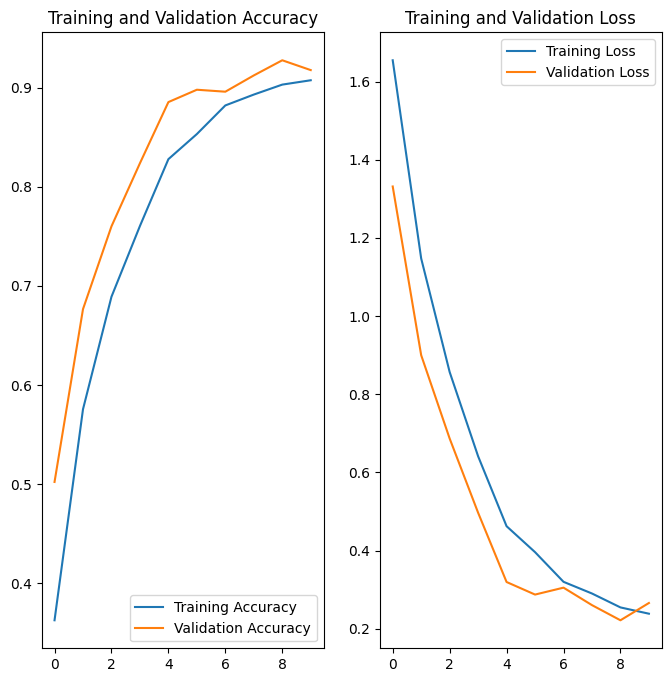

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model2.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy}')

4/4 [==============================] - 15s 1s/step - loss: 1.6907 - accuracy: 0.6321
Test accuracy: 0.6320754885673523


1/1 [==============================] - 3s 3s/step


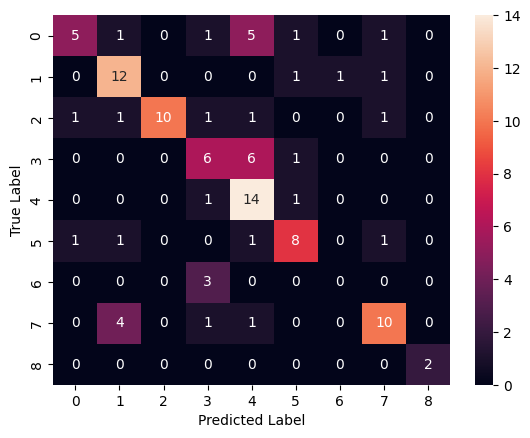

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y_true = []
y_pred = []

for images, labels in test_ds:
  y_true.extend(labels.numpy())
  predictions = model2.predict(images)
  y_pred.extend(np.argmax(predictions, axis=1))

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix, precision, recall, and F1 score
conf_matrix = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

4/4 [==============================] - 7s 239ms/step
Confusion Matrix:
[[1 0 0 3 2 7 0 0 1]
 [0 0 1 2 6 3 0 2 1]
 [1 2 1 2 4 2 0 2 1]
 [0 2 1 2 4 4 0 0 0]
 [2 0 1 2 5 6 0 0 0]
 [0 2 2 2 5 1 0 0 0]
 [0 2 1 0 0 0 0 0 0]
 [1 2 0 0 8 3 0 2 0]
 [1 1 0 0 0 0 0 0 0]]
Precision: 0.13796229667483828
Recall: 0.11320754716981132
F1 Score: 0.10853119075561976


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model2.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get class names
class_names = test_ds.class_names

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

4/4 [==============================] - 18s 1s/step
                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        14
      basal cell carcinoma       0.16      0.20      0.18        15
            dermatofibroma       0.00      0.00      0.00        15
                  melanoma       0.15      0.15      0.15        13
                     nevus       0.14      0.25      0.18        16
pigmented benign keratosis       0.17      0.17      0.17        12
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.21      0.19      0.20        16
           vascular lesion       0.50      0.50      0.50         2

                  accuracy                           0.14       106
                 macro avg       0.15      0.16      0.15       106
              weighted avg       0.12      0.14      0.13       106



In [ ]:
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model2.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate for fine-tuning
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(180,180)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    if predicted_class_index in class_indices:
        predicted_class_name = class_indices[predicted_class_index]
        return predicted_class_name
    else:
        return "Unknown Class" # Or handle it in a way that suits your application

In [ ]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
# Extract class names from the dataset
class_names = list(train_ds.class_names)  # Assuming 'class_names' is a property of the dataset object

# Create the class indices dictionary
class_indices = {v: k for k, v in enumerate(class_names)}

class_indices

{'actinic keratosis': 0,
 'basal cell carcinoma': 1,
 'dermatofibroma': 2,
 'melanoma': 3,
 'nevus': 4,
 'pigmented benign keratosis': 5,
 'seborrheic keratosis': 6,
 'squamous cell carcinoma': 7,
 'vascular lesion': 8}

In [ ]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/pigmented benign keratosis_original_ISIC_0028662.jpg_ab3f1646-77da-45f9-a873-955369032522.jpg'

predicted_class_name = predict_image_class(model2, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 69ms/step
Predicted Class Name: Unknown Class


In [ ]:
model.save('drive/MyDrive/Youtube/trained_models/model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2.save('drive/MyDrive/Youtube/trained_models/model2.h5')

In [ ]:
model.save('model1.h5')

In [ ]:
model2.save('model2.h5')